## Preliminary 

In [2]:
import sys
sys.path.append("utils/")
from Analysis_func import *

load the dataset
---------------------------------------------------------------
Accuracy Direct: 14.41%
Accuracy 3Step1: 31.0%
Accuracy 3Step2: 47.6%
Accuracy 3Step3: 44.98%
Accuracy Cot: 52.4%


/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhounan/miniconda3/envs/Chain_of_Information/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


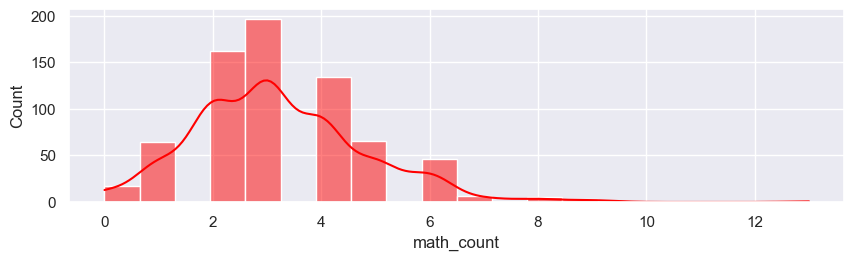

In [13]:
# data processing 
if not os.path.isfile('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_cot.csv'):
    # load the data
    Positive_Integer_index = []
    for i in range(len(GSM8K_test_df)):
        Positive_Integer_index.append((GSM8K_test_df["answer_clean"][i][0] != "-") and ('.' not in GSM8K_test_df["answer_clean"][i]))

    GSM8K_test_df_Pos_int = GSM8K_test_df[Positive_Integer_index].reset_index(drop=True)
    #-------------------------------------------------------------------------------------------------------
    GSM8K_test_df_min_1 = GSM8K_test_df_Pos_int.iloc[0:100,].reset_index(drop=True)
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_0to100_direct_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')

    df_Q_summary_direct_1 = summary_extrator(dic_result_collection, GSM8K_test_df_min_1)

    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_0to100_cot_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')    

    df_Q_summary_cot_1 = summary_extrator(dic_result_collection, GSM8K_test_df_min_1)

    #-------------------------------------------------------------------------------------------------------
    GSM8K_test_df_min_2 = GSM8K_test_df_Pos_int.iloc[100:400,].reset_index(drop=True)
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_100to400_direct_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')

    df_Q_summary_direct_2 = summary_extrator(dic_result_collection, GSM8K_test_df_min_2)

    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_100to400_cot_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')    

    df_Q_summary_cot_2 = summary_extrator(dic_result_collection, GSM8K_test_df_min_2)

    #-------------------------------------------------------------------------------------------------------
    GSM8K_test_df_min_3 = GSM8K_test_df_Pos_int.iloc[400:700,].reset_index(drop=True)
    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_400to700_direct_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')

    df_Q_summary_direct_3 = summary_extrator(dic_result_collection, GSM8K_test_df_min_3)

    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_400to700_cot_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')    

    df_Q_summary_cot_3 = summary_extrator(dic_result_collection, GSM8K_test_df_min_3)

    # stack the two DataFrames
    df_Q_summary_direct = pd.concat([df_Q_summary_direct_1, df_Q_summary_direct_2], ignore_index=True, axis=0).reset_index(drop=True)
    df_Q_summary_direct = pd.concat([df_Q_summary_direct, df_Q_summary_direct_3], ignore_index=True, axis=0).reset_index(drop=True)

    df_Q_summary_cot = pd.concat([df_Q_summary_cot_1, df_Q_summary_cot_2], ignore_index=True, axis=0).reset_index(drop=True)
    df_Q_summary_cot = pd.concat([df_Q_summary_cot, df_Q_summary_cot_3], ignore_index=True, axis=0).reset_index(drop=True)


    # saving the dataframe
    df_Q_summary_cot.to_csv('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_cot.csv', index = False)


    # saving the dataframe
    df_Q_summary_direct.to_csv('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_direct.csv', index = False)

    #-------------------------------------------------------------------------------------------------------
    GSM8K_test_df_min = GSM8K_test_df_Pos_int.iloc[0:700,].reset_index(drop=True)

    with open('inference/result/info_entropy_dacinci_GSM8K/step_3_index_list.pkl', "rb") as fp:   # Unpickling
        step_3_index_list = pickle.load(fp)

    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step1_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')

    df_Q_summary_3step1 = summary_extrator_step(dic_result_collection, GSM8K_test_df_min,step_3_index_list)

    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step2_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')    

    df_Q_summary_3step2 = summary_extrator_step(dic_result_collection, GSM8K_test_df_min,step_3_index_list)

    with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_4shot_700_3step3_5r.pkl', 'rb') as fp:
        dic_result_collection = pickle.load(fp)
        print('load dictionary')    

    df_Q_summary_3step3 = summary_extrator_step(dic_result_collection, GSM8K_test_df_min,step_3_index_list)

    GSM8K_test_df_min = GSM8K_test_df_Pos_int.iloc[0:700,].reset_index(drop=True)

    # saving the dataframe
    df_Q_summary_3step1.to_csv('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_3step1.csv', index = False)

    # saving the dataframe
    df_Q_summary_3step2.to_csv('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_3step2.csv', index = False)
    df_Q_summary_3step3.to_csv('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_3step3.csv', index = False)
else:

    Positive_Integer_index = []
    for i in range(len(GSM8K_test_df)):
        Positive_Integer_index.append((GSM8K_test_df["answer_clean"][i][0] != "-") and ('.' not in GSM8K_test_df["answer_clean"][i]))

    GSM8K_test_df_Pos_int = GSM8K_test_df[Positive_Integer_index].reset_index(drop=True)
    print("load the dataset")
    df_Q_summary_cot = pd.read_csv('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_cot.csv')
    df_Q_summary_direct = pd.read_csv('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_direct.csv')

    df_Q_summary_3step1 = pd.read_csv('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_3step1.csv', index_col = "index")
    df_Q_summary_3step2 = pd.read_csv('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_3step2.csv', index_col = "index")
    df_Q_summary_3step3 = pd.read_csv('inference/result/info_entropy_dacinci_GSM8K/df_Q_summary_3step3.csv', index_col = "index")

#-------------------------------------------------------------------------------------------------------

with open('inference/result/info_entropy_dacinci_GSM8K/step_3_index_list.pkl', "rb") as fp:   # Unpickling
    step_3_index_list = pickle.load(fp)
GSM8K_test_df_min = GSM8K_test_df_Pos_int.iloc[0:700,].reset_index(drop=True)
import string

math_count = []

for i in range(len(GSM8K_test_df_min)):
    math_count.append(np.sum([i.isnumeric() for i in remove_punctuation(GSM8K_test_df_min["question"][i]).split(' ')]))
    
GSM8K_test_df_min["math_count"] = math_count

fig, axs = plt.subplots(1, 1, figsize=(10, 2.5))
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(data=GSM8K_test_df_min, x="math_count", color="red", label="false", kde=True, bins=20)

combine_index_1 = set(list(df_Q_summary_cot.index)) & set(list(df_Q_summary_direct.index)) 
combine_index_2 = set(list(df_Q_summary_3step1.index)) & set(list(df_Q_summary_3step2.index)) 


combine_index = combine_index_1 & combine_index_2

combine_index =  list(combine_index & set(list(df_Q_summary_3step3.index)))
df_Q_summary_direct = df_Q_summary_direct.iloc[combine_index].reset_index(drop=True)
df_Q_summary_cot = df_Q_summary_cot.iloc[combine_index].reset_index(drop=True)

df_Q_summary_3step1 = df_Q_summary_3step1.loc[combine_index].reset_index(drop=True)
df_Q_summary_3step2 = df_Q_summary_3step2.loc[combine_index].reset_index(drop=True)
df_Q_summary_3step3 = df_Q_summary_3step3.loc[combine_index].reset_index(drop=True)

print("---------------------------------------------------------------")
print("Accuracy Direct: " + str(np.round(np.sum(df_Q_summary_direct['correct'])/len(df_Q_summary_direct)*100,2)) + "%")  
print("Accuracy 3Step1: " + str(np.round(np.sum(df_Q_summary_3step1['correct'])/len(df_Q_summary_3step1)*100,2)) + "%")  
print("Accuracy 3Step2: " + str(np.round(np.sum(df_Q_summary_3step2['correct'])/len(df_Q_summary_3step2)*100,2)) + "%")  
print("Accuracy 3Step3: " + str(np.round(np.sum(df_Q_summary_3step3['correct'])/len(df_Q_summary_3step3)*100,2)) + "%")  
print("Accuracy Cot: " + str(np.round(np.sum(df_Q_summary_cot['correct'])/len(df_Q_summary_cot)*100,2)) + "%")  

GSM8K_test_df_min_sub = GSM8K_test_df_min.iloc[combine_index].reset_index(drop=True)

234
Accuracy: 14.53%
Entropy_True: 0.8155841810504437
Entropy_False: 1.3515072553931349


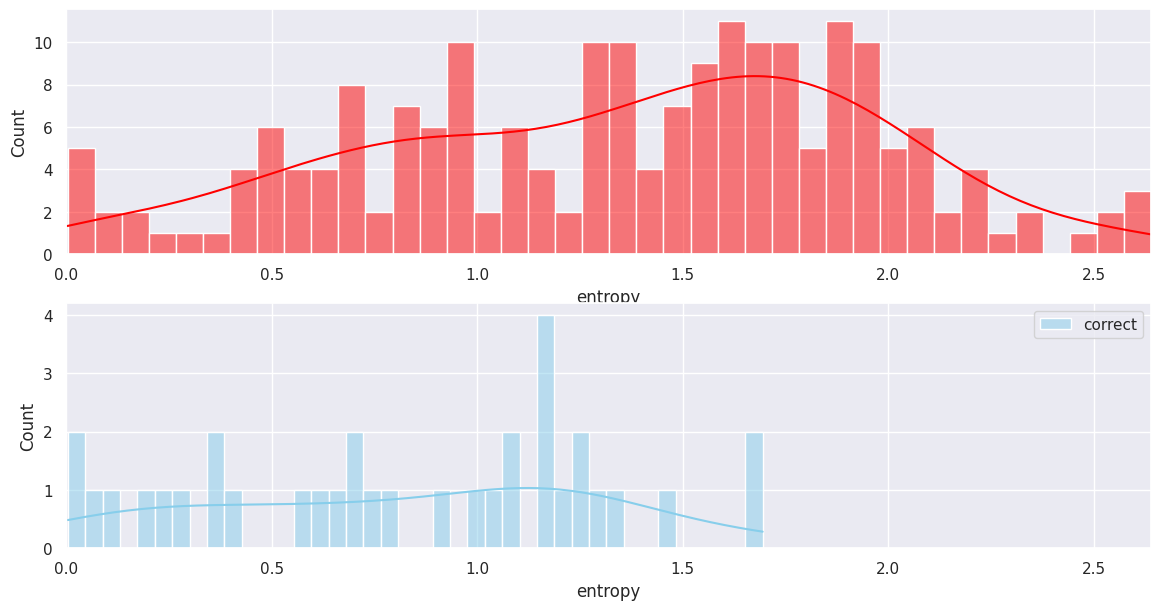

234
Accuracy: 30.34%
Entropy_True: 0.8929036132862677
Entropy_False: 1.4361369721708135


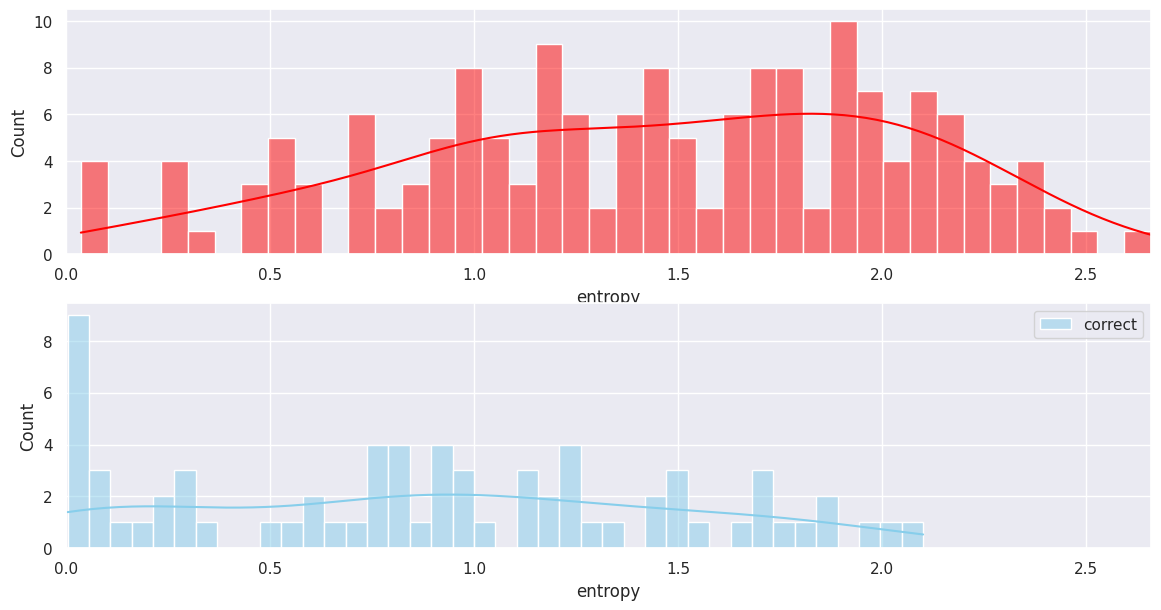

234
Accuracy: 47.44%
Entropy_True: 0.5200549114607853
Entropy_False: 1.0827469465953397


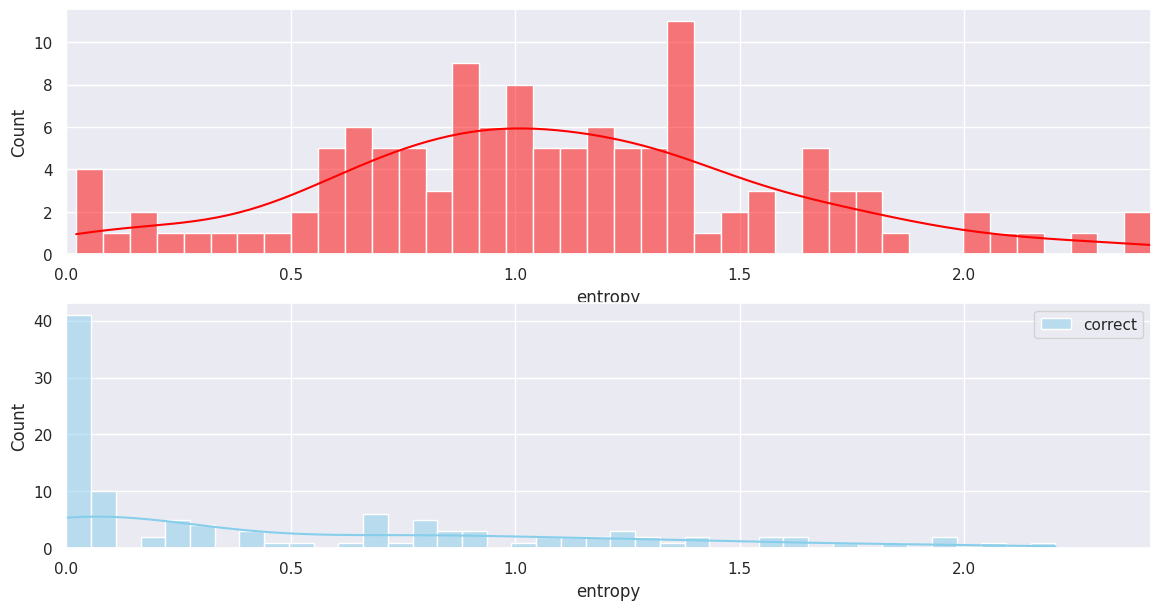

234
Accuracy: 52.56%
Entropy_True: 0.31285744935386955
Entropy_False: 0.893617345758916


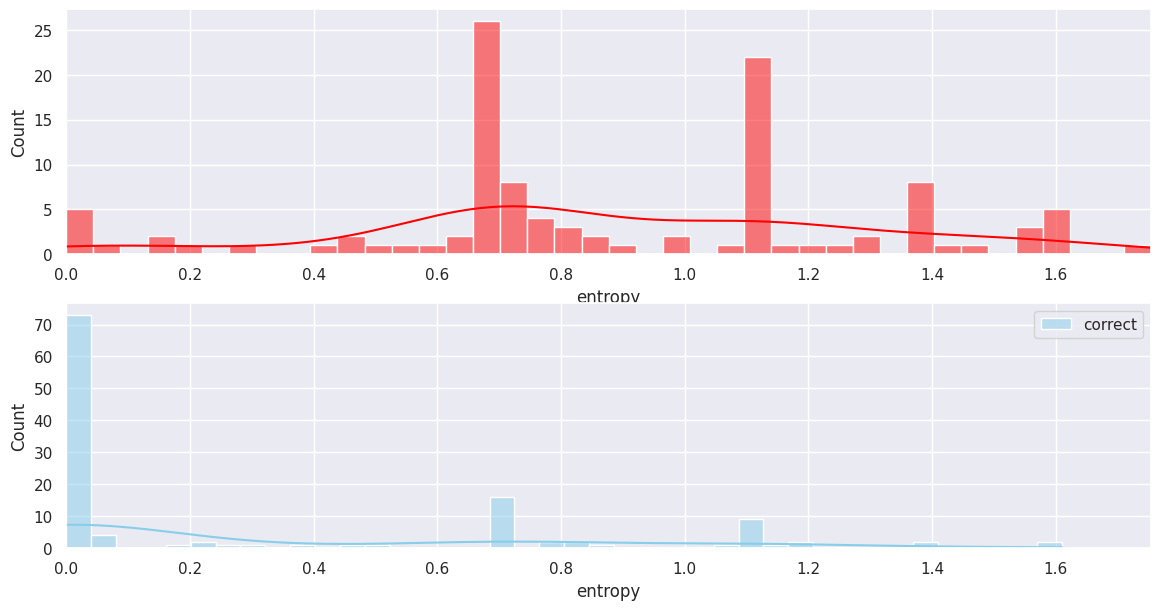

In [ ]:
# data analysis and plot
def df_Q_summary_process(df_Q_summary):
    print(len(df_Q_summary))
    accuracy = np.round(np.sum(df_Q_summary["answer_clean"] == df_Q_summary["test_answer"])/len(df_Q_summary)*100,2)
    print("Accuracy: " + str(accuracy) + "%")

    df_Q_summary_true = df_Q_summary[df_Q_summary["answer_clean"] == df_Q_summary["test_answer"]].reset_index(drop=True)

    Entropy_True = np.mean(df_Q_summary_true["entropy"])
    print("Entropy_True: " + str(Entropy_True))
    df_Q_summary_false = df_Q_summary[df_Q_summary["answer_clean"] != df_Q_summary["test_answer"]].reset_index(drop=True)

    Entropy_False = np.mean(df_Q_summary_false["entropy"])
    print("Entropy_False: " + str(Entropy_False))

    fig, axs = plt.subplots(2, 1, figsize=(14, 7))
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")
    sns.histplot(data=df_Q_summary_false, x="entropy", color="red", label="false", kde=True, ax=axs[0], bins=40)

    sns.histplot(data=df_Q_summary_true, x="entropy", color="skyblue", label="correct", kde=True, ax=axs[1], bins=40)

    plt.setp(axs, xlim = (0,max(df_Q_summary_false['entropy'])))
    plt.legend() 
    plt.show() 
    return accuracy, Entropy_True, Entropy_False

df_Q_summary_matrix = np.zeros((4,3))
df_Q_summary_matrix[0,] = df_Q_summary_process(df_Q_summary_direct)
df_Q_summary_matrix[1,] = df_Q_summary_process(df_Q_summary_3step1)
df_Q_summary_matrix[2,] = df_Q_summary_process(df_Q_summary_3step2)
df_Q_summary_matrix[3,] = df_Q_summary_process(df_Q_summary_3step3)
df_Q_summary_matrix[4,] = df_Q_summary_process(df_Q_summary_cot)

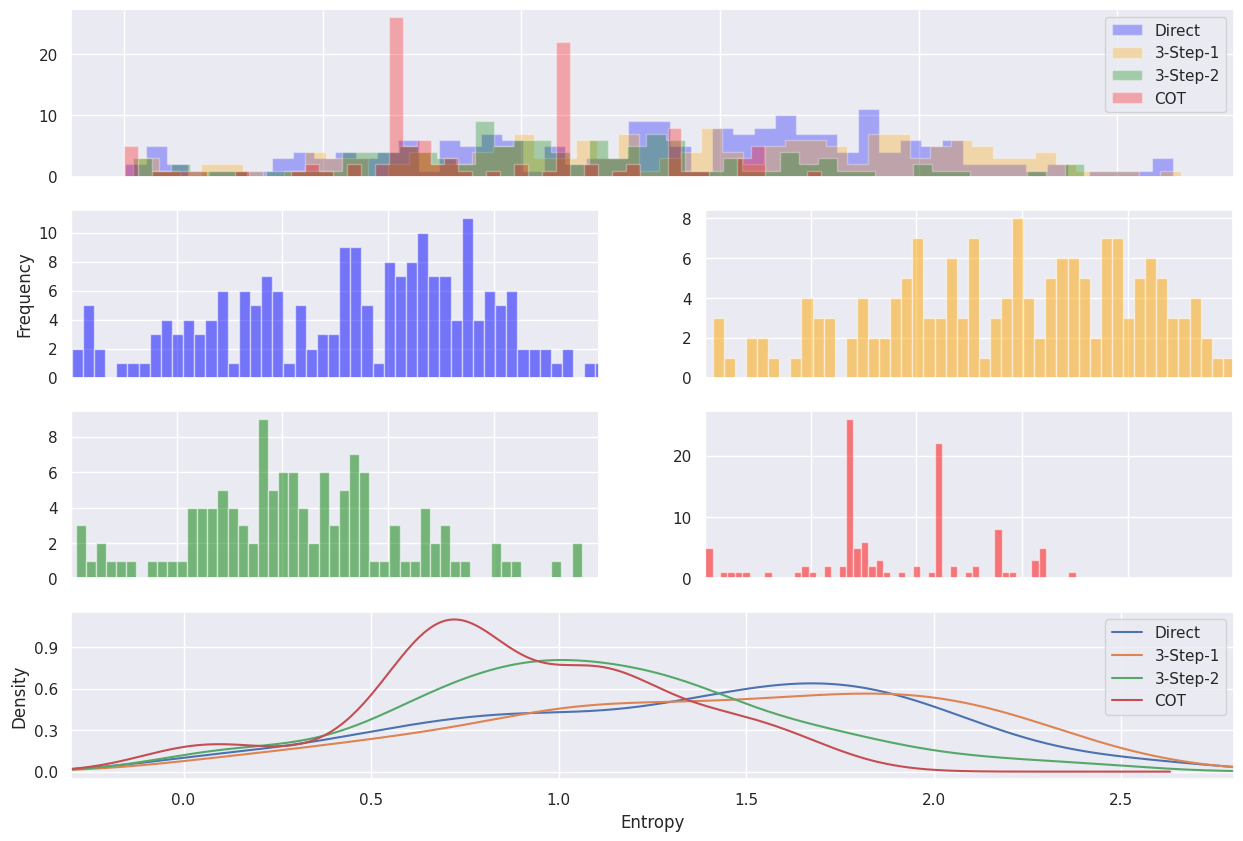

In [ ]:
# False Distribution Plot

from scipy.stats import kde

fig = plt.figure(figsize=(15, 10))
fig.add_subplot(411)   #top left

x1 = df_Q_summary_direct[df_Q_summary_direct["correct"] == False]["entropy"]
x2 = df_Q_summary_3step1[df_Q_summary_3step1["correct"] == False]["entropy"]
x3 = df_Q_summary_3step2[df_Q_summary_3step2["correct"] == False]["entropy"]
x4 = df_Q_summary_cot[df_Q_summary_cot["correct"] == False]["entropy"]
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=50)
plt.hist(x1, **kwargs,color = "blue", label= "Direct")
plt.hist(x2, **kwargs, color = "orange", label= "3-Step-1")
plt.hist(x3, **kwargs, color = "green", label= "3-Step-2")
plt.hist(x4, **kwargs, color = "red", label= "COT")
plt.tick_params('x', labelbottom=False)
plt.legend()

fig.add_subplot(423)
x1 = df_Q_summary_direct[df_Q_summary_direct["correct"] == False]["entropy"]
kwargs = dict(alpha=0.5, bins=50, color = "blue")
plt.hist(x1, **kwargs)
plt.ylabel("Frequency")
plt.tick_params('x', labelbottom=False)
plt.xlim((0,2.5))
plt.yticks(np.arange(0,12,2))


fig.add_subplot(424)   #top right
x1 = df_Q_summary_3step1[df_Q_summary_3step1["correct"] == False]["entropy"]
kwargs = dict(alpha=0.5, bins=50, color = "orange")
plt.hist(x1, **kwargs)
plt.tick_params('x', labelbottom=False)
plt.xlim((0,2.5))

fig.add_subplot(425) 
x1 = df_Q_summary_3step2[df_Q_summary_3step2["correct"] == False]["entropy"]
kwargs = dict(alpha=0.5, bins=50, color = "green")
plt.hist(x1, **kwargs)
plt.xlim((0,2.5))
plt.tick_params('x', labelbottom=False)
plt.yticks(np.arange(0,10,2))

fig.add_subplot(426) 
x1 = df_Q_summary_cot[df_Q_summary_cot["correct"] == False]["entropy"]
kwargs = dict(alpha=0.5, bins=50, color = "red")
plt.hist(x1, **kwargs)
plt.xlim((0,2.5))
plt.tick_params('x', labelbottom=False)

fig.add_subplot(414) 

x1 = df_Q_summary_direct[df_Q_summary_direct["correct"] == False]["entropy"]
x1.plot(kind='density', label= "Direct")

x1 = df_Q_summary_3step1[df_Q_summary_3step1["correct"] == False]["entropy"]
x1.plot(kind='density', label= "3-Step-1")

x1 = df_Q_summary_3step2[df_Q_summary_3step2["correct"] == False]["entropy"]
x1.plot(kind='density', label= "3-Step-2")

x1 = df_Q_summary_cot[df_Q_summary_cot["correct"] == False]["entropy"]
x1.plot(kind='density', label= "COT")
plt.xlim((-0.3,2.8))
plt.xlabel("Entropy")
plt.legend()
plt.yticks(np.arange(0,1,0.3))


plt.savefig('inference/result/pic/false_dist.png')
plt.show()

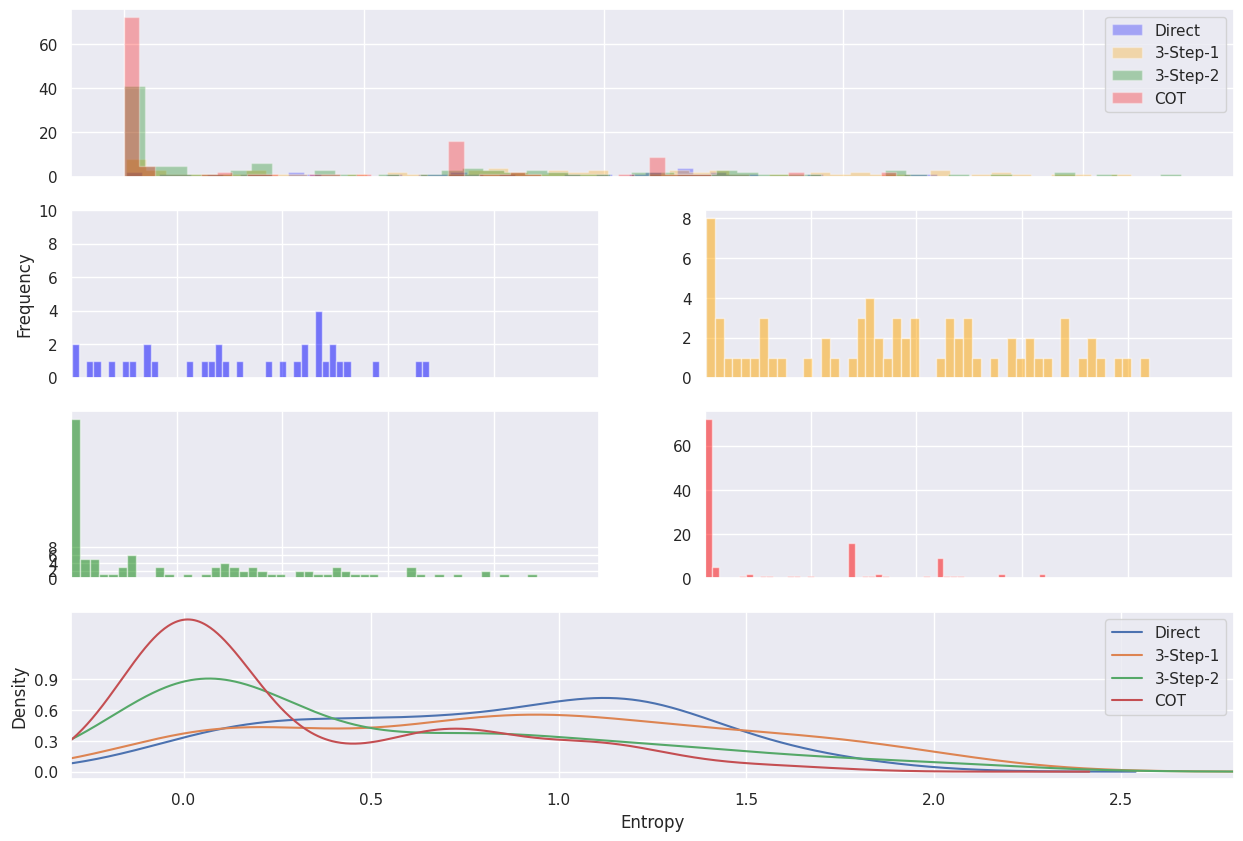

In [ ]:
# True Analysis Plot
from scipy.stats import kde

fig = plt.figure(figsize=(15, 10))
fig.add_subplot(411)   #top left

x1 = df_Q_summary_direct[df_Q_summary_direct["correct"] == True]["entropy"]
x2 = df_Q_summary_3step1[df_Q_summary_3step1["correct"] == True]["entropy"]
x3 = df_Q_summary_3step2[df_Q_summary_3step2["correct"] == True]["entropy"]
x4 = df_Q_summary_cot[df_Q_summary_cot["correct"] == True]["entropy"]
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=50)
plt.hist(x1, **kwargs,color = "blue", label= "Direct")
plt.hist(x2, **kwargs, color = "orange", label= "3-Step-1")
plt.hist(x3, **kwargs, color = "green", label= "3-Step-2")
plt.hist(x4, **kwargs, color = "red", label= "COT")
plt.tick_params('x', labelbottom=False)
plt.legend()

fig.add_subplot(423)
x1 = df_Q_summary_direct[df_Q_summary_direct["correct"] == True]["entropy"]
kwargs = dict(alpha=0.5, bins=50, color = "blue")
plt.hist(x1, **kwargs)
plt.ylabel("Frequency")
plt.tick_params('x', labelbottom=False)
plt.xlim((0,2.5))
plt.yticks(np.arange(0,12,2))


fig.add_subplot(424)   #top right
x1 = df_Q_summary_3step1[df_Q_summary_3step1["correct"] == True]["entropy"]
kwargs = dict(alpha=0.5, bins=50, color = "orange")
plt.hist(x1, **kwargs)
plt.tick_params('x', labelbottom=False)
plt.xlim((0,2.5))

fig.add_subplot(425) 
x1 = df_Q_summary_3step2[df_Q_summary_3step2["correct"] == True]["entropy"]
kwargs = dict(alpha=0.5, bins=50, color = "green")
plt.hist(x1, **kwargs)
plt.xlim((0,2.5))
plt.tick_params('x', labelbottom=False)
plt.yticks(np.arange(0,10,2))

fig.add_subplot(426) 
x1 = df_Q_summary_cot[df_Q_summary_cot["correct"] == True]["entropy"]
kwargs = dict(alpha=0.5, bins=50, color = "red")
plt.hist(x1, **kwargs)
plt.xlim((0,2.5))
plt.tick_params('x', labelbottom=False)

fig.add_subplot(414) 

x1 = df_Q_summary_direct[df_Q_summary_direct["correct"] == True]["entropy"]
x1.plot(kind='density', label= "Direct")

x1 = df_Q_summary_3step1[df_Q_summary_3step1["correct"] == True]["entropy"]
x1.plot(kind='density', label= "3-Step-1")

x1 = df_Q_summary_3step2[df_Q_summary_3step2["correct"] == True]["entropy"]
x1.plot(kind='density', label= "3-Step-2")

x1 = df_Q_summary_cot[df_Q_summary_cot["correct"] == True]["entropy"]
x1.plot(kind='density', label= "COT")
plt.xlim((-0.3,2.8))
plt.xlabel("Entropy")
plt.legend()
plt.yticks(np.arange(0,1,0.3))


plt.savefig('inference/result/pic/false_dist.png')
plt.show()

In [ ]:
# distribution difference test

import scipy.stats as stats
from sklearn import preprocessing

def distribution_test(df_Q_summary):
    # Perform the Kolmogorov-Smirnov test
    Normal_False_list = preprocessing.normalize([np.array(df_Q_summary[df_Q_summary["correct"] == False]["entropy"])])[0]
    Normal_True_list = preprocessing.normalize([np.array(df_Q_summary[df_Q_summary["correct"] == True]["entropy"])])[0]

    statistic, p_value = stats.ks_2samp(Normal_False_list, Normal_True_list)

    Normal_False_list[Normal_False_list < 1e-9]  = 1e-9
    Normal_True_list[Normal_True_list < 1e-9]  = 1e-9

    # Print the test results
    print(f"Kolmogorov-Smirnov statistic: {statistic}")
    print(f"P-value: {p_value}")

    def uneven_kl_divergence(pk,qk):
        if len(pk)>len(qk):
            pk = np.random.choice(pk,len(qk))
        elif len(qk)>len(pk):
            qk = np.random.choice(qk,len(pk))
        return np.sum(pk * np.log(pk/qk))
    n = 1000
    kl_value = 0 
    for i in range(n):
        kl_value += uneven_kl_divergence(Normal_True_list, Normal_False_list)
    kl_value = kl_value/n 
    print(kl_value)

    return statistic, p_value, kl_value

print('------------------------------------------------')
tmp = distribution_test(df_Q_summary_direct)

print('------------------------------------------------')
tmp = distribution_test(df_Q_summary_3step1)

print('------------------------------------------------')
tmp = distribution_test(df_Q_summary_3step2)

print('------------------------------------------------')
tmp = distribution_test(df_Q_summary_cot)

------------------------------------------------
Kolmogorov-Smirnov statistic: 0.6464705882352941
P-value: 3.618114264934107e-12
6.1914314987044055
------------------------------------------------
Kolmogorov-Smirnov statistic: 0.38209625853279183
P-value: 5.571798326172436e-07
5.202546822353302
------------------------------------------------
Kolmogorov-Smirnov statistic: 0.46099758294880244
P-value: 9.452641309411861e-12
4.031365844984576
------------------------------------------------
Kolmogorov-Smirnov statistic: 0.5728411338167436
P-value: 2.860871887559735e-18
5.508522870972996


In [ ]:
# TF analyasis

GSM8K_test_df_min_sub["cot_correct"] = df_Q_summary_cot['correct']
GSM8K_test_df_min_sub["3step1_correct"] = df_Q_summary_3step1['correct']
GSM8K_test_df_min_sub["3step2_correct"] = df_Q_summary_3step2['correct']
GSM8K_test_df_min_sub["direct_correct"] = df_Q_summary_direct['correct']

GSM8K_test_df_min_sub["cot_entropy"] = df_Q_summary_cot['entropy']
GSM8K_test_df_min_sub["3step1_entropy"] = df_Q_summary_3step1['entropy']
GSM8K_test_df_min_sub["3step2_entropy"] = df_Q_summary_3step2['entropy']
GSM8K_test_df_min_sub["direct_entropy"] = df_Q_summary_direct['entropy']

def TF_analysis(name1,name2,dataset, print_index = True):
    index_list = np.array(["    "] * len(dataset))
    FF_list = [ (GSM8K_test_df_min_sub[name1+"_correct"][i] == False) and (GSM8K_test_df_min_sub[name2+"_correct"][i] == False) for i in range(len(GSM8K_test_df_min_sub))]
    FT_list = [ (GSM8K_test_df_min_sub[name1+"_correct"][i] == False) and (GSM8K_test_df_min_sub[name2+"_correct"][i] == True) for i in range(len(GSM8K_test_df_min_sub))]
    TF_list = [ (GSM8K_test_df_min_sub[name1+"_correct"][i] == True) and (GSM8K_test_df_min_sub[name2+"_correct"][i] == False) for i in range(len(GSM8K_test_df_min_sub))]
    TT_list = [ (GSM8K_test_df_min_sub[name1+"_correct"][i] == True) and (GSM8K_test_df_min_sub[name2+"_correct"][i] == True) for i in range(len(GSM8K_test_df_min_sub))]

    index_list[FF_list] = "FF"
    index_list[FT_list] = "FT"
    index_list[TF_list] = "TF"
    index_list[TT_list] = "TT"

    dataset_copy = dataset.copy()

    dataset_copy["answer_logic_index"] = index_list

    TT_rate = np.round(np.sum(TT_list)/len(dataset_copy)*100,2)
    TF_rate = np.round(np.sum(TF_list)/len(dataset_copy)*100,2)
    FT_rate = np.round(np.sum(FT_list)/len(dataset_copy)*100,2)
    FF_rate = np.round(np.sum(FF_list)/len(dataset_copy)*100,2)
    Entropy_Reduction_Rate = np.round(np.sum([dataset_copy[name2 + "_entropy"] > dataset_copy[name1 + "_entropy"]])/len(dataset_copy)*100,2)
    Entropy_Increase_Rate = np.round(np.sum([dataset_copy[name2 + "_entropy"] < dataset_copy[name1 + "_entropy"]])/len(dataset_copy)*100,2)

    if print_index:
        print('True-True: ' + str(TT_rate) + '%' )
        print('True-False: ' + str(TF_rate) + '%' )
        print('False-True: ' + str(FT_rate) + '%' )
        print('False-False: ' + str(FF_rate) + '%' )
        print('Entropy Reduction: ' + str(Entropy_Reduction_Rate) + '%' )
        print('Entropy Increase: ' + str(Entropy_Increase_Rate) + '%' )
        print('----------------------------------------------------------------')

    # -------------------------------------------------------------------------------------------
    tmp_df = dataset_copy[TT_list].reset_index(drop=True)
    TT_Entropy_Reduction_rate = np.round(np.sum([tmp_df[name2 + "_entropy"] > tmp_df[name1 + "_entropy"]])/len(tmp_df)*100,2)
    TT_Entropy_Increase_rate = np.round(np.sum([tmp_df[name2 + "_entropy"] < tmp_df[name1 + "_entropy"]])/len(tmp_df)*100,2)
    if print_index:
        print('In True-True Entropy Reduction: ' + str(TT_Entropy_Reduction_rate) + '%' )
        print('In True-True Entropy Increase: ' + str(TT_Entropy_Increase_rate) + '%' )
        print('----------------------------------------------------------------')
    # -------------------------------------------------------------------------------------------
    tmp_df = dataset_copy[TF_list].reset_index(drop=True)
    TF_Entropy_Reduction_rate = np.round(np.sum([tmp_df[name2 + "_entropy"] > tmp_df[name1 + "_entropy"]])/len(tmp_df)*100,2)
    TF_Entropy_Increase_rate = np.round(np.sum([tmp_df[name2 + "_entropy"] < tmp_df[name1 + "_entropy"]])/len(tmp_df)*100,2)
    if print_index:
        print('In True-False Entropy Reduction: ' + str(TF_Entropy_Reduction_rate) + '%' )
        print('In True-False Entropy Increase: ' + str(TF_Entropy_Increase_rate) + '%' )

        print('----------------------------------------------------------------')
    # -------------------------------------------------------------------------------------------
    tmp_df = dataset_copy[FT_list].reset_index(drop=True)
    FT_Entropy_Reduction_rate = np.round(np.sum([tmp_df[name2 + "_entropy"] > tmp_df[name1 + "_entropy"]])/len(tmp_df)*100,2)
    FT_Entropy_Increase_rate = np.round(np.sum([tmp_df[name2 + "_entropy"] < tmp_df[name1 + "_entropy"]])/len(tmp_df)*100,2)
    if print_index: 
        print('In False-True Entropy Reduction: ' + str(FT_Entropy_Reduction_rate) + '%' )
        print('In False-True Entropy Increase: ' + str(FT_Entropy_Increase_rate) + '%' )

        print('----------------------------------------------------------------')
    # -------------------------------------------------------------------------------------------
    tmp_df = dataset_copy[FF_list].reset_index(drop=True)
    FF_Entropy_Reduction_rate = np.round(np.sum([tmp_df[name2 + "_entropy"] > tmp_df[name1 + "_entropy"]])/len(tmp_df)*100,2)
    FF_Entropy_Increase_rate = np.round(np.sum([tmp_df[name2 + "_entropy"] < tmp_df[name1 + "_entropy"]])/len(tmp_df)*100,2)
    if print_index:
        print('In False-False Entropy Reduction: ' + str(FF_Entropy_Reduction_rate) + '%' )
        print('In False-False Entropy Increase: ' + str(FF_Entropy_Increase_rate) + '%' )
    return TT_rate,TF_rate,FT_rate,FF_rate, Entropy_Reduction_Rate, Entropy_Increase_Rate,  TT_Entropy_Reduction_rate, TT_Entropy_Increase_rate, TF_Entropy_Reduction_rate, TF_Entropy_Increase_rate , FT_Entropy_Reduction_rate, FT_Entropy_Increase_rate ,FF_Entropy_Reduction_rate, FF_Entropy_Increase_rate  

In [ ]:
_ = TF_analysis("cot",'3step2',GSM8K_test_df_min_sub, True)

True-True: 26.07%
True-False: 26.5%
False-True: 21.37%
False-False: 26.07%
Entropy Reduction: 58.97%
Entropy Increase: 41.03%
----------------------------------------------------------------
In True-True Entropy Reduction: 62.3%
In True-True Entropy Increase: 37.7%
----------------------------------------------------------------
In True-False Entropy Reduction: 82.26%
In True-False Entropy Increase: 17.74%
----------------------------------------------------------------
In False-True Entropy Reduction: 22.0%
In False-True Entropy Increase: 78.0%
----------------------------------------------------------------
In False-False Entropy Reduction: 62.3%
In False-False Entropy Increase: 37.7%


In [ ]:
# plot
plt.figure(figsize =(10, 4))
sns.scatterplot(x = "cot_entropy", 
                y = "direct_entropy", 
                hue = "answer_logic_index", 
                data = GSM8K_test_df_min_sub, 
                legend=True, 
                style="answer_logic_index",
                palette="Set2")
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize =(10, 4))
sns.scatterplot(x = "math_count", 
                y = "direct_entropy", 
                hue = "direct_correct", 
                data = GSM8K_test_df_min_sub, 
                legend=True, 
                style="direct_correct",
                palette="Set2")
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize =(10, 4))
sns.scatterplot(x = "math_count", 
                y = "cot_entropy", 
                hue = "cot_correct", 
                data = GSM8K_test_df_min_sub, 
                legend=True, 
                style="cot_correct",
                palette="Set2")
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()


ValueError: Could not interpret value `answer_logic_index` for parameter `hue`

<Figure size 1000x400 with 0 Axes>

In [ ]:
# Read dictionary pkl file
with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_direct_Q10_30r_4shot.pkl', 'rb') as fp:
    dic_result_direct = pickle.load(fp)
    print('load dictionary')

# Read dictionary pkl file
with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step1_Q10_30r_4shot.pkl', 'rb') as fp:
    dic_result_3step1 = pickle.load(fp)
    print('load dictionary')

# Read dictionary pkl file
with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step2_Q10_30r_4shot.pkl', 'rb') as fp:
    dic_result_3step2 = pickle.load(fp)
    print('load dictionary')

# Read dictionary pkl file
with open('inference/result/info_entropy_dacinci_GSM8K/Danvinci02_3step3_Q10_30r_4shot.pkl', 'rb') as fp:
    dic_result_3step3 = pickle.load(fp)
    print('load dictionary')

# data processing
def data_process(dic_result):
    n_round = 30
    df = pd.DataFrame(columns=["token", 'logprob'])
    for i in tqdm(range(n_round)):
        result_i = dic_result[i]["choices"]
        if '{' in  result_i[0]["logprobs"]["tokens"]:
            index = result_i[0]["logprobs"]["tokens"].index('{')
        else:
            index = result_i[0]["logprobs"]["tokens"].index(' {')
        sample_token = result_i[0]["logprobs"]["tokens"][index+1]
        sample_token_logprob = result_i[0]["logprobs"]["token_logprobs"][index+1]
        df.loc[len(df)] = [sample_token, sample_token_logprob]  
        log_list = result_i[0]["logprobs"]["top_logprobs"][index+1]
        for key in list(log_list.keys()):
            df.loc[len(df)] = [key, log_list[key]]
            df["token"] = [i.replace(" ","") for i in df["token"]]
    df_result = pd.DataFrame(columns=["token", 'logprob'])
    for token in np.unique(df["token"]):
        df_result.loc[len(df_result)] = [token, np.mean(df[df["token"] == token]["logprob"])]
    df_result["prob"] = np.exp(df_result["logprob"])
    df_result["prob"] = df_result["prob"]/np.sum(df_result["prob"])
    df_result["logprob"] = np.log(df_result["prob"])
    df_result = df_result.sort_values(by = "prob", ascending = False).reset_index(drop=True)

    df_result["cumprob"] = np.cumsum(df_result["prob"])

    df_result_majority = df_result[df_result["cumprob"] < 1] 

    df_result_majority = df_result_majority[[i.replace(' ','').isnumeric() for i in df_result_majority["token"]]].reset_index(drop=True)

    df_result_majority["prob"] = np.exp(df_result_majority["logprob"])
    df_result_majority["prob"] = df_result_majority["prob"]/np.sum(df_result_majority["prob"])

    df_result_majority["cumprob"] = np.cumsum(df_result_majority["prob"])

    return df_result_majority

df_result_direct = data_process(dic_result_direct)

df_result_3step1 = data_process(dic_result_3step1)

df_result_3step2 = data_process(dic_result_3step2)

df_result_3step3 = data_process(dic_result_3step3)

load dictionary
load dictionary
load dictionary
load dictionary


100%|██████████| 30/30 [00:00<00:00, 142.76it/s]


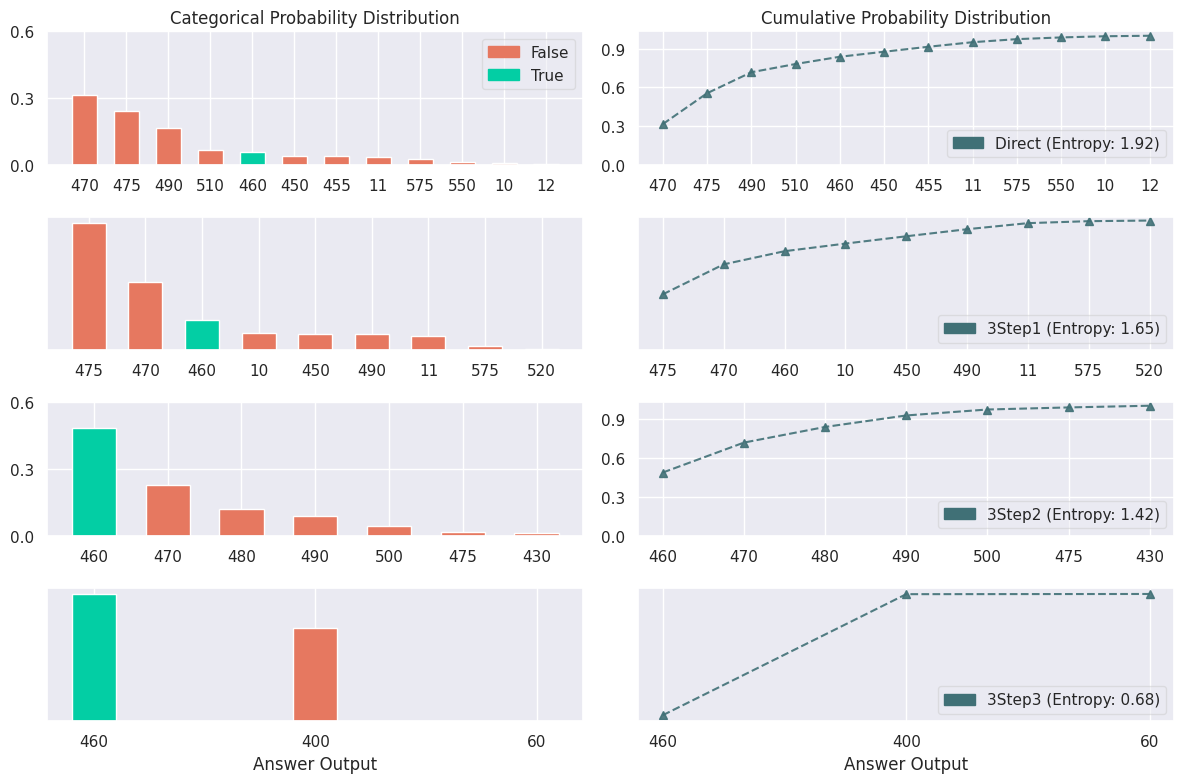

Entropy: 1.920083637658502
Entropy: 1.653383578922698
Entropy: 1.4221356945914747
Entropy: 0.6865265916431912


In [ ]:
# plot
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(12, 8))

color_list = ['#E67860'] * len(df_result_direct["token"])
index_460 = list(df_result_direct["token"]).index('460')
color_list[index_460] = '#03CEA4'
plt.subplot(4, 2, 1)
plt.bar(df_result_direct["token"], df_result_direct["prob"],color = color_list ,width = 0.6, label = "Direct")
plt.yticks(np.arange(0,0.7,0.3))
plt.title('Categorical Probability Distribution')
# Create a legend with a color box
female_patch = mpatches.Patch(color='#E67860', label='False')
male_patch = mpatches.Patch(color='#03CEA4', label='True')
plt.legend(handles=[female_patch, male_patch], loc='upper right', framealpha=0.5, frameon=True)

# Plot the corresponding cumulative probability distribution
plt.subplot(4, 2, 2)
plt.plot(df_result_direct["token"], df_result_direct["cumprob"], marker="^", linestyle='--', color='#407076', alpha=0.9)
plt.yticks(np.arange(0,1,0.3))
plt.title('Cumulative Probability Distribution')
female_patch = mpatches.Patch(color='#407076', label='Direct (Entropy: 1.92)')
plt.legend(handles=[female_patch], loc='lower right', framealpha=0.5, frameon=True)

plt.subplot(4, 2, 3)
color_list = ['#E67860'] * len(df_result_3step1["token"])
index_460 = list(df_result_3step1["token"]).index('460')
color_list[index_460] = '#03CEA4'
plt.bar(df_result_3step1["token"], df_result_3step1["prob"],color = color_list,width = 0.6)
plt.yticks([])

# Plot the corresponding cumulative probability distribution
plt.subplot(4, 2, 4)
plt.plot(df_result_3step1["token"], df_result_3step1["cumprob"], marker="^", linestyle='--', color='#407076', alpha=0.9)
plt.yticks(np.arange(0,1,0.3))
female_patch = mpatches.Patch(color='#407076', label='3Step1 (Entropy: 1.65)')
plt.legend(handles=[female_patch], loc='lower right', framealpha=0.5, frameon=True)
plt.yticks([])

plt.subplot(4, 2, 5)
color_list = ['#E67860'] * len(df_result_3step2["token"])
index_460 = list(df_result_3step2["token"]).index('460')
color_list[index_460] = '#03CEA4'
plt.bar(df_result_3step2["token"], df_result_3step2["prob"],color = color_list,width = 0.6)
plt.yticks(np.arange(0,0.7,0.3))

# Plot the corresponding cumulative probability distribution
plt.subplot(4, 2, 6)
plt.plot(df_result_3step2["token"], df_result_3step2["cumprob"], marker="^", linestyle='--', color='#407076', alpha=0.9)
plt.yticks(np.arange(0,1,0.3))
female_patch = mpatches.Patch(color='#407076', label='3Step2 (Entropy: 1.42)')
plt.legend(handles=[female_patch], loc='lower right', framealpha=0.5, frameon=True)

plt.subplot(4, 2, 7)
plt.bar(df_result_3step3["token"], df_result_3step3["prob"],color = color_list,width = 0.2)
plt.xlabel('Answer Output')
plt.yticks([])

# Plot the corresponding cumulative probability distribution
plt.subplot(4, 2, 8)
color_list = ['#E67860'] * len(df_result_3step3["token"])
index_460 = list(df_result_3step3["token"]).index('460')
color_list[index_460] = '#03CEA4'
plt.plot(df_result_3step3["token"], df_result_3step3["cumprob"], marker="^", linestyle='--', color='#407076', alpha=0.9)
plt.xlabel('Answer Output')
plt.yticks([])
female_patch = mpatches.Patch(color='#407076', label='3Step3 (Entropy: 0.68)')
plt.legend(handles=[female_patch], loc='lower right', framealpha=0.5, frameon=True)

# Adjust the layout for better readability
plt.tight_layout()

# Save the plot to a file (optional)
plt.savefig('Q10_dist.png')

# Show the plot
plt.show()

# Entropy Calculation 
H = entropy(df_result_direct['prob'])
print("Entropy: " + str(H))

# Entropy Calculation 
H = entropy(df_result_3step1['prob'])
print("Entropy: " + str(H))

# Entropy Calculation 
H = entropy(df_result_3step2['prob'])
print("Entropy: " + str(H))

# Entropy Calculation 
H = entropy(df_result_3step3['prob'])
print("Entropy: " + str(H))


In [ ]:

# data process function
def single_test_plot(df_result_majority):
    # Plot
    plt.subplot(2, 1, 1)
    plt.bar(df_result_majority["token"], df_result_majority["prob"])
    plt.xlabel('Categories')
    plt.ylabel('Probability')
    plt.title('Categorical Probability Distribution')

    # Plot the corresponding cumulative probability distribution
    plt.subplot(2, 1, 2)
    plt.plot(df_result_majority["token"], df_result_majority["cumprob"], marker='o', linestyle='-', color='r')
    plt.xlabel('Categories')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Probability Distribution')

    # Adjust the layout for better readability
    plt.tight_layout()

    # Save the plot to a file (optional)
    plt.savefig('plot.png')

    # Show the plot
    plt.show()

    # Entropy Calculation 
    H = entropy(df_result_majority['prob'])
    print("Entropy: " + str(H))
    return H